In [ ]:
import pandas as pd
import numpy as np

from sklearn import neighbors

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
from google.colab import files
f=files.upload()

Saving Admissions.csv to Admissions.csv


In [ ]:
df=pd.read_csv('Admissions.csv')
df

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


In [ ]:
#predictor variable
featuresScale=preprocessing.minmax_scale(df[['gre','gpa','rank']])
print(type(featuresScale))
featuresScale[0:5]

<class 'numpy.ndarray'>


array([[0.27586207, 0.77586207, 0.66666667],
       [0.75862069, 0.81034483, 0.66666667],
       [1.        , 1.        , 0.        ],
       [0.72413793, 0.53448276, 1.        ],
       [0.51724138, 0.38505747, 1.        ]])

In [ ]:
#response variable
labels=df['admit'].values
print(type(labels))
labels[0:5]

<class 'numpy.ndarray'>


array([0, 1, 1, 1, 0])

In [ ]:
RANDOM_SEED=0
train_feats,test_feats,train_lab,test_lab=\
 train_test_split(featuresScale,labels,test_size=0.33,random_state=RANDOM_SEED)

In [ ]:
print('Training Data Predictor Variables')
print(train_feats[0:5])
print('Training Data Response Variables')
print(train_lab[0:5])

Training Data Predictor Variables
[[0.89655172 0.7816092  1.        ]
 [0.37931034 0.28735632 0.33333333]
 [0.4137931  0.4137931  0.        ]
 [0.62068966 0.75287356 0.66666667]
 [0.75862069 0.81034483 0.33333333]]
Training Data Response Variables
[0 0 0 0 0]


In [ ]:
print('Test Data Predictor Variables')
print(test_feats[0:5])
print('Test Data Response Variables')
print(test_lab[0:5])

Test Data Predictor Variables
[[0.62068966 0.65517241 0.33333333]
 [0.37931034 0.4137931  0.66666667]
 [0.5862069  0.22413793 0.66666667]
 [0.75862069 0.46551724 0.66666667]
 [0.79310345 0.62068966 0.33333333]]
Test Data Response Variables
[0 0 1 0 0]


In [ ]:
clf=neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(train_feats, train_lab)
predClass=clf.predict(test_feats)
print(predClass)

[0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0
 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1
 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0]


In [ ]:
cm=confusion_matrix(predClass,test_lab)
print(cm)
print('Accuracy Score :',accuracy_score(predClass, test_lab))

[[63 29]
 [25 15]]
Accuracy Score : 0.5909090909090909


In [ ]:
clf=neighbors.KNeighborsClassifier(n_neighbors=8)
clf.fit(train_feats, train_lab)
predClass=clf.predict(test_feats)
print(predClass)

cm=confusion_matrix(predClass,test_lab)
print(cm)
print('Accuracy Score :',accuracy_score(predClass, test_lab))
print(test_lab[0:132])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0]
[[83 34]
 [ 5 10]]
Accuracy Score : 0.7045454545454546
[0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0
 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1]


In [ ]:
##########################################################
#create a graph of K and accuracy

accuracy_values=[]
k_values=[]
train_feats.shape[0]

for i in range(1,train_feats.shape[0]):
    clf = neighbors.KNeighborsClassifier(n_neighbors=i).fit(train_feats, train_lab)
    y_predict = clf.predict(test_feats)
    accuracy = accuracy_score(test_lab, y_predict)
    accuracy_values.append(accuracy)
    k_values.append(i)
    pass


In [ ]:
import matplotlib.pyplot as plt

Maximum Accuracy: 0.7045454545454546
1 0.5909090909090909
2 0.6590909090909091
3 0.6136363636363636
4 0.6363636363636364
5 0.6439393939393939
6 0.6590909090909091
7 0.6590909090909091
8 0.7045454545454546
9 0.696969696969697
10 0.6818181818181818
11 0.6893939393939394
12 0.6893939393939394
13 0.7045454545454546
14 0.6818181818181818
15 0.6893939393939394
16 0.6742424242424242
17 0.6893939393939394
18 0.6818181818181818
19 0.6893939393939394
20 0.6893939393939394
21 0.7045454545454546
22 0.696969696969697
23 0.7045454545454546
24 0.6893939393939394
25 0.696969696969697
26 0.6818181818181818
27 0.696969696969697
28 0.6893939393939394
29 0.696969696969697
30 0.6818181818181818
31 0.6742424242424242
32 0.6742424242424242
33 0.6742424242424242
34 0.6666666666666666
35 0.6666666666666666
36 0.6666666666666666
37 0.6590909090909091
38 0.6666666666666666
39 0.6818181818181818
40 0.6742424242424242
41 0.6742424242424242
42 0.6590909090909091
43 0.6515151515151515
44 0.6590909090909091
45 0.6590

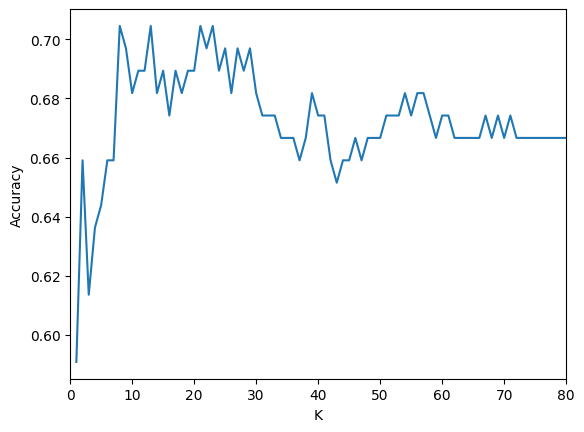

In [ ]:
accuracy_values = np.array(accuracy_values)
k_values = np.array(k_values)

plt.plot(k_values,accuracy_values)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.xlim([0, 80])
##########################################################

print("Maximum Accuracy:", np.max(accuracy_values))

for k, acc in zip(k_values, accuracy_values):
    print(k, acc)


#8 13 21 23

When K = 8, 13, 21, 23, it has highest accuracy 0.7045454545454546. Therefore, we can choose 8 to classify the data because too many groups are hard to distinguish.